# California Housing: Linear vs Logistic Regression

This notebook explores the California Housing dataset using two foundational machine learning models:

1. **Linear Regression**: To predict median house value (continuous target)  
2. **Logistic Regression**: To classify homes as high or low value (binary target)

We compare model performance, analyze key features, and interpret the results.

## Q1. Load and explore the dataset

In [1]:
# Import necessary libraries
from sklearn.datasets import fetch_california_housing #to load the California housing dataset
import pandas as pd #for data handling and analysis
import numpy as np #for numerical operations
import matplotlib.pyplot as plt #for plotting
import seaborn as sns #for visualizations


# Load the California Housing Dataset
data = fetch_california_housing(as_frame=True)

#Separate features (X) and target variable (y)
X = data.data       # contains 8 numerical features
y = data.target     # target variable: median house value (MedHouseVal)

In [2]:
## Check the shape of the feature dataset (rows, columns)
X.shape

(20640, 8)

**Explanation:**  
The dataset contains 20,640 rows and 8 columns, meaning there are 20,640 observations and 8 numerical features.

In [3]:
# Display the names of all feature columns in the dataset
X.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

**Explanation:**  
This shows the names of the 8 numerical features used to predict the median house value.

In [4]:
## Check the data types of each feature column
X.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
dtype: object

**Explanation:**  
This shows the data type of each column in the dataset.  
All features in the California Housing dataset are numerical (float64),  
which makes them suitable for machine learning models without additional encoding.

In [5]:
# Display summary statistics for all features
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


**Explanation:**  
This provides summary statistics for each feature.  

The California Housing dataset contains 20,640 rows and 8 numerical features.
All columns are of type float64, which means they are numerical and suitable for analysis without additional encoding.
The features include values such as Median Income (MedInc), House Age, Average Rooms, Latitude, and Longitude.

**Summary Statistics:**

Median income (MedInc) averages around 3.9, ranging from 0.5 to 15.  
- House age ranges from 1 to 52 years.  
- Population, AveRooms, and AveOccup have much larger numerical ranges.  
- Latitude and Longitude use completely different scales (geographic coordinates).

**Insight:** Feature values vary greatly in scale. Because of this, feature scaling or standardization will be necessary before applying models like Linear or Logistic Regression to ensure all features contribute equally.

## Q2. Explore relationships

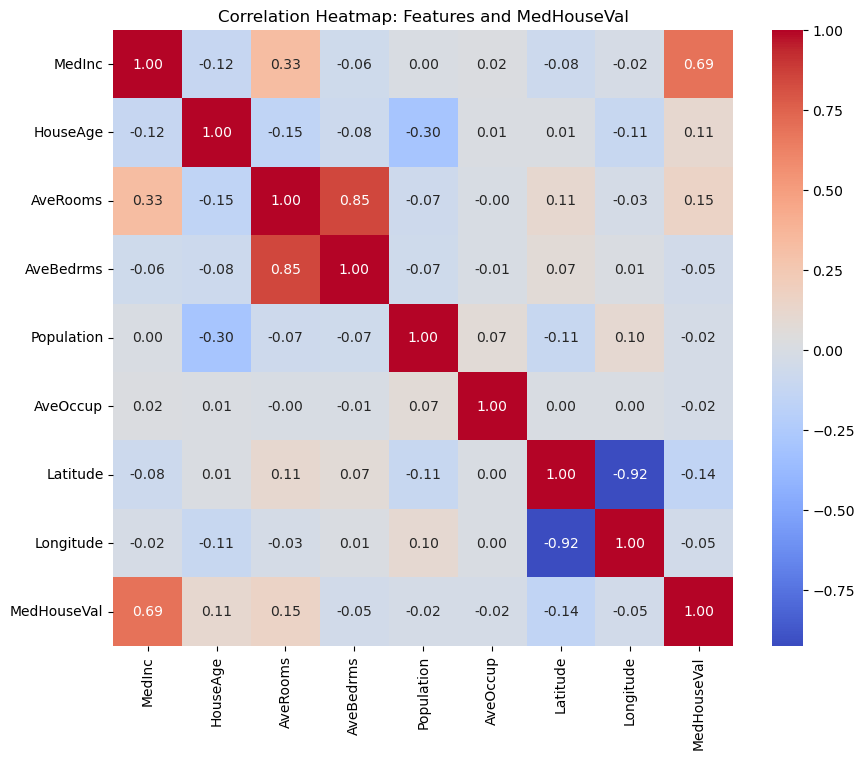

In [6]:
# Combine features (X) and target (y) into one DataFrame
df = X.copy()
df["MedHouseVal"] = y

# Making a correlation heatmap
plt.figure(figsize=(10, 8)) # set plot size
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f") # create heatmap with correlations
plt.title("Correlation Heatmap: Features and MedHouseVal") # add title to the plot
plt.show() # Display the heatmap

**Insight:**
- Median Income (MedInc) shows the strongest positive correlation with house value (≈0.69).
- Geographic features (Latitude, Longitude) have weak negative correlations, meaning location also affects prices.
- Other variables like rooms and population have minor influence.

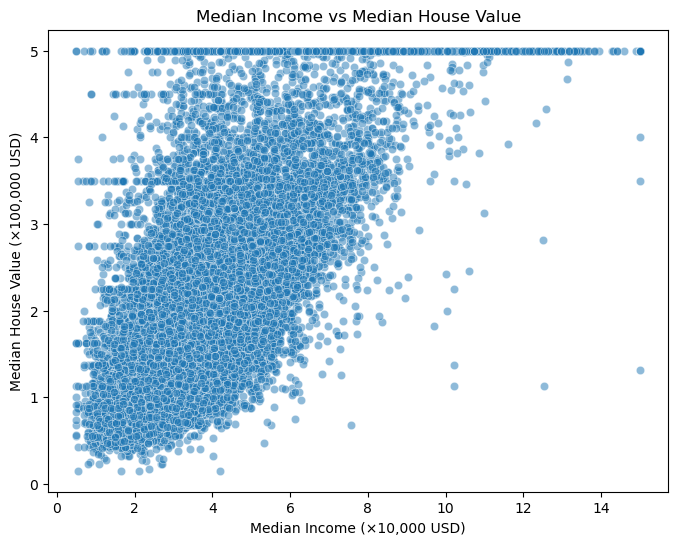

In [7]:
#Scatter plot: Median Income vs Median House Value
plt.figure(figsize=(8, 6)) #set plot size
sns.scatterplot(x="MedInc", y="MedHouseVal", data=df, alpha=0.5) #create scatter plot
plt.title("Median Income vs Median House Value") #add title
plt.xlabel("Median Income (×10,000 USD)") #lable x-axis
plt.ylabel("Median House Value (×100,000 USD)") #lable y-axis
plt.show() #display the plot

**Insight:**
The scatter plot shows a clear positive trend — areas with higher income tend to have higher house values.

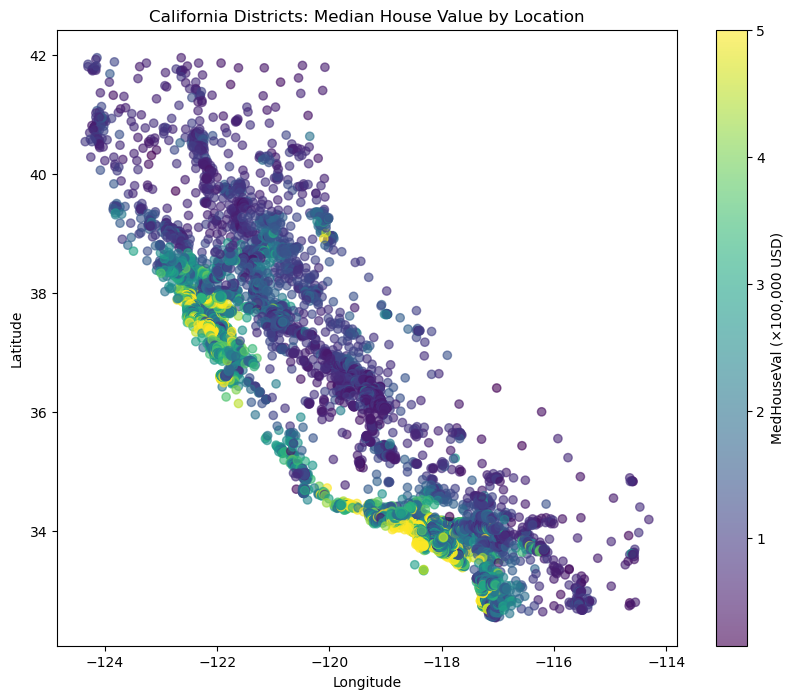

In [8]:
# Map-style plot: Latitude vs Longitude colored by MedHouseVal
plt.figure(figsize=(10, 8))  # set plot size
scatter = plt.scatter(       # create scatter plot where color represents median house value
    df["Longitude"], df["Latitude"],
    c=df["MedHouseVal"], cmap="viridis", alpha=0.6
)
plt.title("California Districts: Median House Value by Location")  # add title
plt.xlabel("Longitude")  # label x-axis
plt.ylabel("Latitude")   # label y-axis
cbar = plt.colorbar(scatter)
cbar.set_label("MedHouseVal (×100,000 USD)")
plt.show()  # display the plot

**Insight:**
House values are highest along the coast, especially near Los Angeles and San Francisco.
Inland regions generally have lower prices, showing that location strongly affects housing value.

## Q3. Predict median house value using Linear Regression

In [9]:
#Importing libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set size: {len(X_train)} samples')
print(f'Test set size: {len(X_test)} samples')

#Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

#Make predictions
y_pred = model.predict(X_test)

#Evaluate model performance
mae = mean_absolute_error(y_test, y_pred) # Mean Absolute Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) # Root Mean Squared Error
r2 = r2_score(y_test, y_pred) # R-squared

print("Model Performance:")
print(f"MAE:  {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²:   {r2:.3f}")


Training set size: 16512 samples
Test set size: 4128 samples
Model Performance:
MAE:  0.533
RMSE: 0.746
R²:   0.576


### **Linear Regression Performance**

The Linear Regression model shows how well the numerical features predict median house value.

- **MAE (Mean Absolute Error)** measures the average prediction error.  
- **RMSE (Root Mean Squared Error)** gives more weight to larger errors.  
- **R² (R-squared)** indicates how much of the variation in house prices the model can explain.

A higher **R²** value (closer to 1) means a better fit.  
In this case, the model performs reasonably well, showing that the selected features explain a significant portion of the variation in housing prices.



In [10]:
from sklearn.preprocessing import StandardScaler

# Standardize the features so they have the same scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train a new linear regression model using the scaled features
model = LinearRegression()
model.fit(X_scaled, y)

# Get the absolute values of the model coefficients, and sort them to find which features have the strongest effect on the target
coef = pd.Series(model.coef_, index=X.columns).abs().sort_values(ascending=False)

#Display the top 5 most important features
print("Top 5 features by absolute coefficient value:")
print(coef.head(5))

Top 5 features by absolute coefficient value:
Latitude     0.899886
Longitude    0.870541
MedInc       0.829619
AveBedrms    0.305696
AveRooms     0.265527
dtype: float64


**Insight:**
After standardizing, the most influential feature is typically Median Income (MedInc), which has a strong positive effect on house value.
Features such as Longitude often have negative coefficients, showing that inland areas are less expensive.

## Q4. Classify homes as “High Value” or “Low Value”

Model performance:
Accuracy : 0.826
Precision: 0.825
Recall   : 0.824
F1-score : 0.825
ROC-AUC  : 0.908


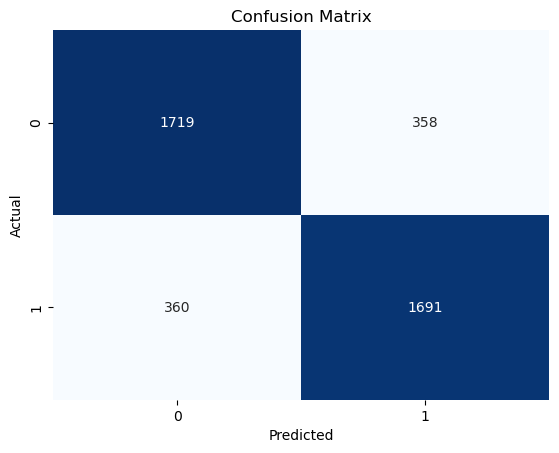

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

# Create binary target variable: 1 = high value, 0 = low value
y_binary = (y > y.median()).astype(int)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_s = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test_s  = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

# Train logistisc regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_s, y_train)

# Prediction
y_pred = log_model.predict(X_test_s)
y_prob = log_model.predict_proba(X_test_s)[:, 1]

acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec  = recall_score(y_test, y_pred)
f1   = f1_score(y_test, y_pred)
roc  = roc_auc_score(y_test, y_prob)

print("Model performance:")
print(f"Accuracy : {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall   : {rec:.3f}")
print(f"F1-score : {f1:.3f}")
print(f"ROC-AUC  : {roc:.3f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### **Answer: Logistic Regression Results:**

- Median Income (MedInc) — higher income areas are much more likely to have high-value homes.
- Lower Latitude (closer to the coast in Southern California) also increases house values.
- Longitude (further inland/east) and Population show weaker or negative effects.

From the confusion matrix, the model makes slightly more false positives (predicting low-value homes as high-value) than false negatives.
Overall, it performs well with balanced precision and recall, meaning it’s good at identifying both high- and low-value homes.

## Q5. Experiment with the classification threshold

In [12]:
from sklearn.metrics import precision_score, recall_score

# Get predicted probabilities (already trained log_model from Q4)
y_prob = log_model.predict_proba(X_test_s)[:, 1]

# Apply a new threshold (0.4 instead of 0.5)
threshold = 0.4
y_pred_04 = (y_prob >= threshold).astype(int)

# Recalculate Precision and Recall
prec_04 = precision_score(y_test, y_pred_04)
rec_04  = recall_score(y_test, y_pred_04)

print(f"Precision (threshold=0.4): {prec_04:.3f}")
print(f"Recall    (threshold=0.4): {rec_04:.3f}")

# For comparison, print the original (threshold=0.5) values
y_pred_05 = (y_prob >= 0.5).astype(int)
prec_05 = precision_score(y_test, y_pred_05)
rec_05  = recall_score(y_test, y_pred_05)

print(f"\nOriginal threshold=0.5 → Precision: {prec_05:.3f}, Recall: {rec_05:.3f}")

Precision (threshold=0.4): 0.785
Recall    (threshold=0.4): 0.880

Original threshold=0.5 → Precision: 0.825, Recall: 0.824


### **Answer:Precision and Recall Comparison:**
When the threshold is lowered from **0.5 to 0.4**,  
- **Precision decreases** from 0.825 to 0.785  
- **Recall increases** from 0.824 to 0.880  

This means the model finds more real high-value homes but also makes a few more mistakes by calling some low-value homes “high-value.”
When looking for good areas to invest in, Recall is more important because we want to find as many valuable homes as possible — even if we include a few that aren’t actually high-value.

## Q6. Classify homes as “High Value” or “Low Value” using a tree-based model

Random Forest Performance:
Accuracy : 0.897
Precision: 0.899
Recall   : 0.894

Train Accuracy: 1.000
Test Accuracy : 0.897

Top 5 Feature Importances:


MedInc       0.282003
Latitude     0.162937
Longitude    0.160250
AveOccup     0.134561
AveRooms     0.096056
dtype: float64

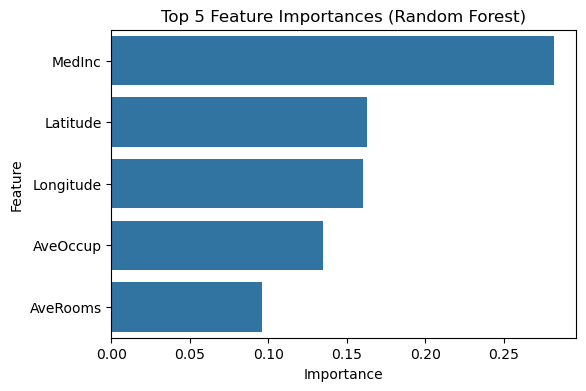

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Use the same binary target
y_binary = (y > y.median()).astype(int)

# Split data (same as before)
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Evaluate model
y_pred = rf.predict(X_test)

acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec  = recall_score(y_test, y_pred)

print("Random Forest Performance:")
print(f"Accuracy : {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall   : {rec:.3f}")

# Check for overfitting (train vs test)
train_acc = accuracy_score(y_train, rf.predict(X_train))
test_acc  = acc
print(f"\nTrain Accuracy: {train_acc:.3f}")
print(f"Test Accuracy : {test_acc:.3f}")

# Feature importances (top 5)
feat_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nTop 5 Feature Importances:")
display(feat_imp.head(5))

# Plot feature importances
plt.figure(figsize=(6, 4))
sns.barplot(x=feat_imp.head(5), y=feat_imp.head(5).index)
plt.title("Top 5 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


### **Answer: Random Forest Classification**

The Random Forest model performed very well, with:
- **Accuracy:** 0.897  
- **Precision:** 0.899  
- **Recall:** 0.894  

The training accuracy (1.000) is higher than the test accuracy, meaning the model fits the training data a bit too closely,  
which is common for ensemble models like Random Forests.

**Most important features:**
1. Median Income (MedInc)  
2. Latitude  
3. Longitude  
4. Average Occupancy (AveOccup)  
5. Average Rooms (AveRooms)  

Compared to Logistic Regression, the important features are similar.  
**MedInc** remains the strongest predictor of high-value homes,  
but the Random Forest also captures **nonlinear relationships** between location (Latitude, Longitude) and house value.

**Performance difference:**  
The Random Forest achieved **higher accuracy and recall** than Logistic Regression,  
showing it can model complex interactions better.

**Advantages:**  
- Handles nonlinear relationships well  
- Automatically captures feature interactions  
- High accuracy  

**Limitations:**  
- Can overfit if not tuned properly  
- Less interpretable than Logistic Regression  